# USD dollar of export and import by Way of transport

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

Define path of file and columns that we need to analize

In [2]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR", "TOTALVALORFOB", "VIATRANSPORTE", "GROUP"]
usecols_import =  ["YEAR", "CIF", "VIA_TRAN", "GROUP"]


Read data, change the columns name and concatenate the files in one big file.

In [3]:
data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)

data_export.columns = ['TRANSPORTE', 'EXPORT', 'YEAR', "GROUP"]
data_import.columns = ['TRANSPORTE', 'IMPORT', 'YEAR', "GROUP"]

final_data = pd.concat([data_import, data_export])

Filter the data by group of plant group and group by transport way and year to plot the dollars acumulate by transport and year.

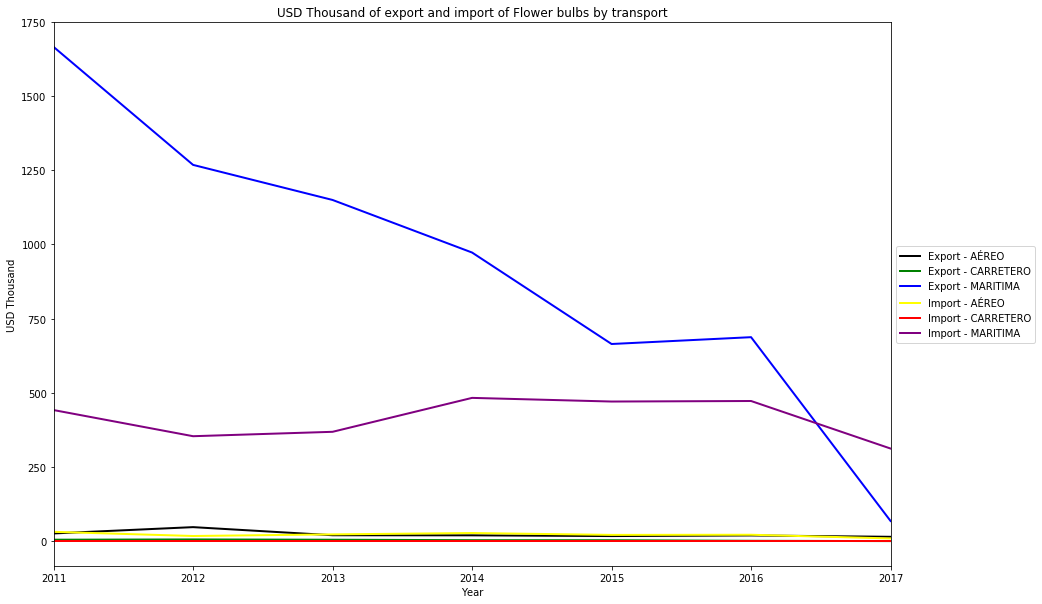

                EXPORT                              IMPORT                       
TRANSPORTE       AÉREO  CARRETERO     MARÍTIMA       AÉREO CARRETERO     MARÍTIMA
YEAR                                                                             
2011        1030676.80  186623.14  66611689.96  1246869.63       0.0  17662373.77
2012        1881087.57  223632.21  50709569.97   686665.46       0.0  14137536.43
2013         787967.76  183169.11  45980974.84   904260.96       0.0  14731005.49
2014         775600.51  122848.34  38894242.78  1086369.20       0.0  19303395.99
2015         677727.98  119082.24  26566175.39   835721.82       0.0  18811113.38
2016         761683.41   40651.09  27485472.91   854072.09       0.0  18882525.68
2017         577684.45       0.00   2708210.09   356862.06       0.0  12473935.88


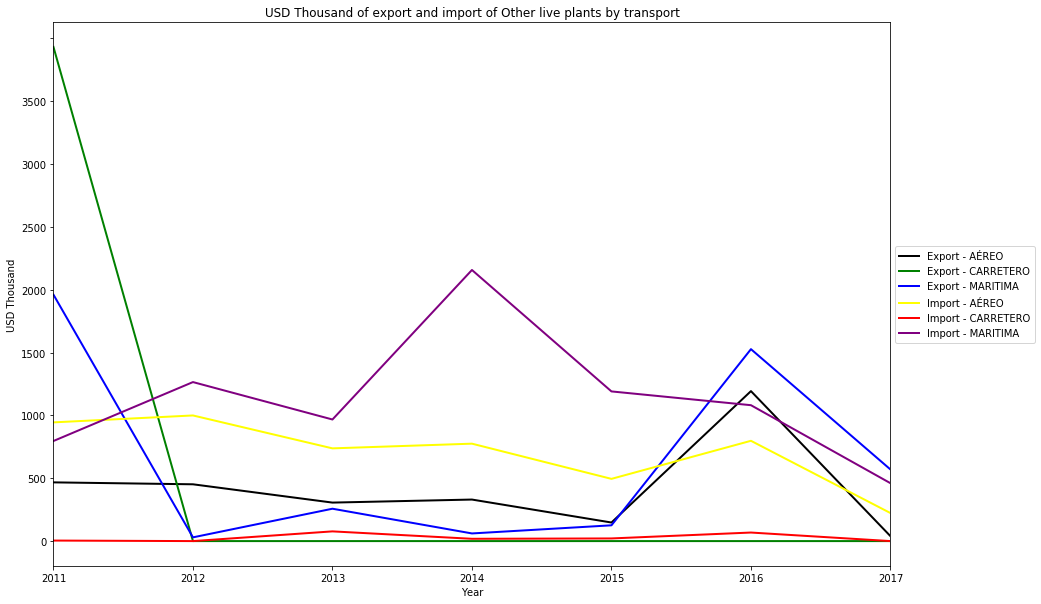

                EXPORT                              IMPORT                      
TRANSPORTE       AÉREO   CARRETERO    MARÍTIMA       AÉREO CARRETERO    MARÍTIMA
YEAR                                                                            
2011         934347.54  7862794.65  3921175.20  1888859.41    8393.6  1592487.29
2012         903685.65        0.00    59427.29  1998954.24       0.0  2530003.73
2013         612527.96        0.00   515094.72  1475441.27  154568.4  1934682.35
2014         660909.76        0.00   121691.23  1550056.56   36564.8  4313561.33
2015         295494.86        0.00   251008.90   990069.55   42192.7  2381427.44
2016        2386165.37        0.00  3053968.42  1595764.24  136055.6  2162203.42
2017          78537.96        0.00  1139600.00   446012.40       0.0   921094.18


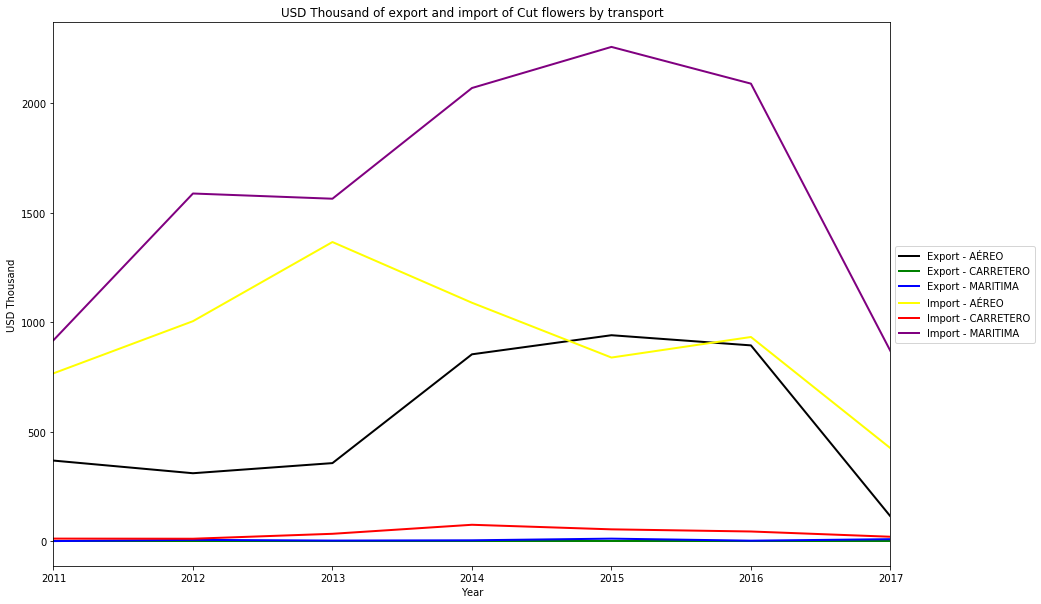

                 EXPORT                            IMPORT                         
TRANSPORTE        AÉREO CARRETERO   MARÍTIMA        AÉREO   CARRETERO     MARÍTIMA
YEAR                                                                              
2011         7355455.91       0.0       0.00  15324465.13   226734.62  18348765.25
2012         6199302.06       0.0  113638.78  20090022.86   215137.25  31753810.96
2013         7124141.25       0.0   47464.00  27320379.60   666145.12  31278135.45
2014        17064033.21       0.0   72000.00  21774862.67  1490487.87  41391053.64
2015        18807491.82       0.0  223879.37  16768086.16  1073269.58  45146577.45
2016        17879332.46       0.0   37912.00  18645873.86   877060.12  41790349.34
2017         2257463.01       0.0  174757.64   8486847.95   396769.78  17363423.34


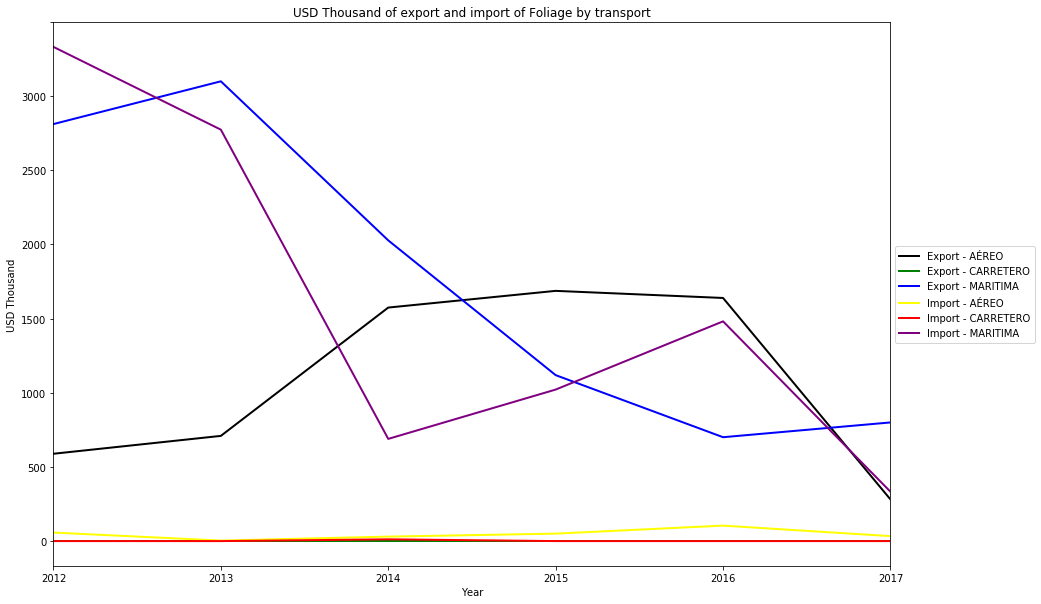

                EXPORT                           IMPORT                      
TRANSPORTE       AÉREO CARRETERO    MARÍTIMA      AÉREO CARRETERO    MARÍTIMA
YEAR                                                                         
2012         588653.08       0.0  2810775.99   57391.42      0.00  3330744.10
2013         709023.64       0.0  3098843.95    3561.41      0.00  2773009.76
2014        1573944.63       0.0  2026733.14   30138.68  11908.94   688874.34
2015        1686495.80       0.0  1118569.41   50275.81      0.00  1021227.34
2016        1638647.61       0.0   700192.84  104312.88      0.00  1481007.18
2017         280925.41       0.0   799701.11   33511.37      0.00   332883.50


In [4]:
for group, scale in [("Flower bulbs",      np.linspace(0, 1750, 8)),
                     ("Other live plants", np.linspace(0, 3500, 8)),
                     ("Cut flowers",       np.linspace(0, 4000, 9)),
                     ("Foliage",           np.linspace(0, 3000, 7))]: 
    
    temporal_data = final_data[final_data["GROUP"] == group]
    
    new_data_grouper = temporal_data.groupby(['YEAR','TRANSPORTE']).sum()

    plot = new_data_grouper.unstack().replace(np.nan, 0).plot(kind='line', figsize=(15, 10), linewidth=2.0,
                                                              color=["black", "green", "blue","yellow", "red", "purple"])

    plot.set_title("USD Thousand of export and import of {} by transport".format(group))
    plot.set_xlabel("Year")
    plot.set_ylabel("USD Thousand")

    plot.legend(["Export - AÉREO", "Export - CARRETERO", "Export - MARITIMA",
                 "Import - AÉREO", "Import - CARRETERO", "Import - MARITIMA"],
                loc='center left', bbox_to_anchor=(1.0, 0.5))


    plot.set_yticklabels([""] + [str(int(x)) for x in scale])
    plt.subplots_adjust(hspace=0.3)

    plt.show()
    print(new_data_grouper.unstack().replace(np.nan, 0).to_string())